## Using `hymagic`

The hymagic extension enables the intermixing of hylang code with python code.

In [14]:
%load_ext hymagic

The hymagic extension is already loaded. To reload it, use:
  %reload_ext hymagic


### hylang Code Blocks

In [15]:
%%hylang
(defn add1 [n]
    (+ n 1))

(print (add1 5))
(add1 11)

6


[None, None, 12L]

### intermixing hylang and python

In [16]:
a = 5
%hylang (setv a (add1 a)) 
a = a + 1
print(a)

[None]

7


### Tail Call Optimization (TCO) Example

In [55]:
%%hylang
(require [hy.contrib.loop [loop]]) ;; need to use "reqiure" to import macros
(defn factorial [x]
  "Take the factorial of x"
  (loop [[n x]
         [accumulator 1]]
    (if (= n 1)
      accumulator
      (recur (dec n) (* accumulator n)))))

(print (factorial 5))
(factorial 5)

120


[None, None, None, 120L]

## A taste of "Scientific Python" in hylang

In [30]:
%matplotlib inline

In [36]:
%%hylang
(import [functools [reduce]]
        [numpy :as np]
        [matplotlib.pyplot :as plt])

[None]

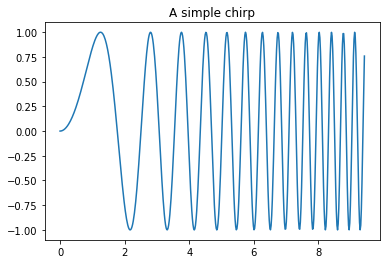

In [39]:
x = np.linspace(0, 3*np.pi, 500)
y = np.sin(x ** 2)
plt.plot(x, np.sin(x**2))
plt.title('A simple chirp');

[None,
 None,

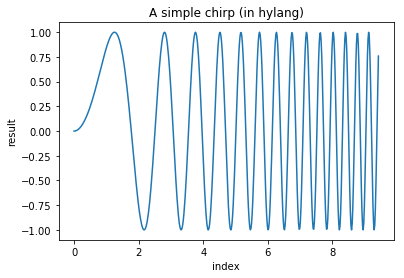

In [38]:
%%hylang
(setv x (np.linspace 0 (* 3 np.pi) 500))
(setv y (np.sin(** x 2)))
(plt.plot x y)
(plt.title "A simple chirp (in hylang)")
(plt.xlabel "index")
(plt.ylabel "result")

## A taste of `toolz` in hylang

In [46]:
%%hylang
(import [cytoolz [map frequencies concat]]) ; map in toolz is lazy by default

[None]

In [48]:
%%hylang
(with [book (open "tale-of-two-cities.txt")]
    (print (.read book)))

It was the best of times,
it was the worst of times,
it was the age of wisdom,
it was the age of foolishness,
it was the epoch of belief,
it was the epoch of incredulity,
it was the season of Light,
it was the season of Darkness,
it was the spring of hope,
it was the winter of despair,
we had everything before us,
we had nothing before us,
we were all going direct to Heaven,
we were all going direct the other way--
in short, the period was so far like the present period, that some of
its noisiest authorities insisted on its being received, for good or for
evil, in the superlative degree of comparison only.



[None]

In [51]:
%%hylang
(with [book (open "tale-of-two-cities.txt")]
    (frequencies (concat (map (fn [x] (.split x " ")) book))))

[{u'Darkness,\n': 1,
  u'Heaven,\n': 1,
  u'It': 1,
  u'Light,\n': 1,
  u'age': 2,
  u'all': 2,
  u'authorities': 1,
  u'before': 2,
  u'being': 1,
  u'belief,\n': 1,
  u'best': 1,
  u'comparison': 1,
  u'degree': 1,
  u'despair,\n': 1,
  u'direct': 2,
  u'epoch': 2,
  u'everything': 1,
  u'evil,': 1,
  u'far': 1,
  u'foolishness,\n': 1,
  u'for': 1,
  u'for\n': 1,
  u'going': 2,
  u'good': 1,
  u'had': 2,
  u'hope,\n': 1,
  u'in': 2,
  u'incredulity,\n': 1,
  u'insisted': 1,
  u'it': 9,
  u'its': 2,
  u'like': 1,
  u'noisiest': 1,
  u'nothing': 1,
  u'of': 11,
  u'of\n': 1,
  u'on': 1,
  u'only.\n': 1,
  u'or': 1,
  u'other': 1,
  u'period': 1,
  u'period,': 1,
  u'present': 1,
  u'received,': 1,
  u'season': 2,
  u'short,': 1,
  u'so': 1,
  u'some': 1,
  u'spring': 1,
  u'superlative': 1,
  u'that': 1,
  u'the': 14,
  u'times,\n': 2,
  u'to': 1,
  u'us,\n': 2,
  u'was': 11,
  u'way--\n': 1,
  u'we': 4,
  u'were': 2,
  u'winter': 1,
  u'wisdom,\n': 1,
  u'worst': 1}]

In [54]:
%%hylang
(with [book (open "tale-of-two-cities-beginning.txt")]
     (->> book
         (map str.upper)
         (map (fn [x] (.split x " ")))
         (concat)
         (frequencies))) 

[{u'AGE': 2,
  u'ALL': 2,
  u'AUTHORITIES': 1,
  u'BEFORE': 2,
  u'BEING': 1,
  u'BELIEF,\n': 1,
  u'BEST': 1,
  u'COMPARISON': 1,
  u'DARKNESS,\n': 1,
  u'DEGREE': 1,
  u'DESPAIR,\n': 1,
  u'DIRECT': 2,
  u'EPOCH': 2,
  u'EVERYTHING': 1,
  u'EVIL,': 1,
  u'FAR': 1,
  u'FOOLISHNESS,\n': 1,
  u'FOR': 1,
  u'FOR\n': 1,
  u'GOING': 2,
  u'GOOD': 1,
  u'HAD': 2,
  u'HEAVEN,\n': 1,
  u'HOPE,\n': 1,
  u'IN': 2,
  u'INCREDULITY,\n': 1,
  u'INSISTED': 1,
  u'IT': 10,
  u'ITS': 2,
  u'LIGHT,\n': 1,
  u'LIKE': 1,
  u'NOISIEST': 1,
  u'NOTHING': 1,
  u'OF': 11,
  u'OF\n': 1,
  u'ON': 1,
  u'ONLY.\n': 1,
  u'OR': 1,
  u'OTHER': 1,
  u'PERIOD': 1,
  u'PERIOD,': 1,
  u'PRESENT': 1,
  u'RECEIVED,': 1,
  u'SEASON': 2,
  u'SHORT,': 1,
  u'SO': 1,
  u'SOME': 1,
  u'SPRING': 1,
  u'SUPERLATIVE': 1,
  u'THAT': 1,
  u'THE': 14,
  u'TIMES,\n': 2,
  u'TO': 1,
  u'US,\n': 2,
  u'WAS': 11,
  u'WAY--\n': 1,
  u'WE': 4,
  u'WERE': 2,
  u'WINTER': 1,
  u'WISDOM,\n': 1,
  u'WORST': 1}]